# 통계 Day 3 과제

## 필수 라이브러리 추가 및 폰트 설정


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
%matplotlib inline

## 실습 1 p148

### 동전이 정상적인가를 검정하기 위해 100번을 던져본 결과, 앞면이 40번 나왔으며 뒷면이 60번 나왔다.
 - 이 동전은 정상인가를 유의수준 $ \alpha = 0.05 $ 로써 검정하라. 
 - 정상적인 동전을 던질 때, 앞면이 나올 확률은 50%이다.

In [2]:
H_count =40 #앞면이 나온 수
n_obs = 100 #관측하는 횟수 
value = 0.5 #일반적으로 앞면이 나올 확률
significance_level = 0.05 #유의수준
#귀무가설 : 이 동전은 정상이다.

#Proportion test 실행
stat, pval = proportions_ztest(H_count,n_obs,value)

print("1 Proportion test")
print("z: {:.3f}".format(stat))
print("p: {:.3f}".format(pval))

if pval > significance_level:
    print("P value가 유의수준 alpha = {}보다 크므로 귀무가설을 채택한다.".format(significance_level))
elif pval < significance_level:
    print("P value가 유의수준 alpha = {}보다 작으므로 귀무가설을 기각한다.".format(significance_level))

1 Proportion test
z: -2.041
p: 0.041
P value가 유의수준 alpha = 0.05보다 작으므로 귀무가설을 기각한다.


귀무가설(H<sub>0</sub>) : 이 동전을 던졌을 때 앞면의 나올 확률이 정상적인 동전을 던졌을 때 앞면이 나올 확률과 같다.
- 즉 이 동전이 정상이다.  


대립가설(H<sub>1</sub>) : 이 동전을 던졌을 때 앞면이 나올 확률이 정상적인 동전을 던졌을 때 앞면이 나올 확률가 다르다.
- 즉 이 동전이 정상이 아니다.

이 문제에서 한 집단의 비율이 특정 비율과 같은지를 검정할 때 사용하는 1 proportion test를 사용했다. 동전의 앞면이 나온 횟수와 동전을 던진 횟수, 그리고 동전이 정살일 때 앞면이 나올 확률을 입력하여 Z값과 p-value를 추출하였다. 나온 Z 값이 -2.041 이므로 이 동전의 경우 모평균에서 표준편차의 약 2배만큼 앞면이 나올 확률이 낮았다는것을 알 수 있다. 그리고 p-value가 0.041이 나왔고 이 값이 유의수준 $ \alpha = 0.05 $보다 작으므로 귀무가설을 기각한다. 따라서 이 동전은 정상이 아니라고 판단 할 수 있다.


## 실습 2 p151

### 동일한 제품을 생산하는 두 공장에서 불량률을 측정한 결과 아래와 같다.
 - 두 공정의 불량률이 같다고 할 수 있는가? $ \alpha = 0.05 $ 
 - 공장 A: N<sub>1</sub> = 1200, X<sub>1</sub> = 14
 - 공장 B: N<sub>2</sub> = 1200, X<sub>2</sub> = 5

In [3]:
count = np.array([14,5]) #공장 A,B에서 나온 불량품의 수 
n_obs = np.array([1200,1200]) #공장 A,B 의 생산량
significance_level =0.05

stat, pval = proportions_ztest(count, n_obs) #2proportion test

print("2 Proportion test")
print("z:{:.3f}".format(stat))
print("p:{:.3f}".format(pval))

if pval > significance_level:
    print("P value가 유의수준 alpha = {}보다 크므로 귀무가설을 채택한다.".format(significance_level))
elif pval < significance_level:
    print("P value가 유의수준 alpha = {}보다 작으므로 귀무가설을 기각한다.".format(significance_level))

2 Proportion test
z:2.073
p:0.038
P value가 유의수준 alpha = 0.05보다 작으므로 귀무가설을 기각한다.


귀무가설(H<sub>0</sub>) : A, B공정의 불량률이 같다.


대립가설(H<sub>1</sub>) : A, B공정의 불량률이 다르다.

이 문제에서 두 집단의 비율이 같은 지를 검정할 때 사용하는 2 proportion test를 사용했다. 각 공정에서 불량품이 나온 횟수와 각 공정의 생산량을 입력하여 Z값과 p-value를 추출하였다. 나온 Z 값이 2.073 이므로  두 비율의 차이가 표준편차의 2배정도 난다는 것을 알 수 있다. 그리고 p-value가 0.038이 나왔고 이 값이 유의수준 $ \alpha = 0.05 $보다 작으므로 귀무가설을 기각한다. 따라서 A, B 공정의 불량률은 다르다고 할 수 있다.


## 실습 3 p159

### 노트북 컴퓨터의 6가지 제품에 대하여 7가지 제품의 이미지를 중복 선택 할 수 있도록 32명의 소비자를 대상으로 설문 조사한 Table이다. 각 제품에 대해 이미지에 대해 차이가 있겠는가?
 -  $ \alpha = 0.05 $

In [4]:
df = pd.read_csv("카이제곱_노트북.csv", engine = "python")

#chi-square test 실행
chi, pval, dof, expected = stats.chi2_contingency(df.T)

print("chi-square test")
print("chisq: {:.3f}".format(chi))
print("p: {:.3f}".format(pval))
print("degree of freedom :{}".format(dof))
print("expected value: \n{}".format(expected.round(3)))

if pval > significance_level:
    print("P value가 유의수준 alpha = {}보다 크므로 귀무가설을 채택한다.".format(significance_level))
elif pval < significance_level:
    print("P value가 유의수준 alpha = {}보다 작으므로 귀무가설을 기각한다.".format(significance_level))

chi-square test
chisq: 95.759
p: 0.000
degree of freedom :30
expected value: 
[[10.224  8.179 11.247  7.157  6.135  8.179  5.879]
 [ 8.43   6.744  9.274  5.901  5.058  6.744  4.848]
 [ 5.381  4.305  5.919  3.767  3.229  4.305  3.094]
 [ 3.946  3.157  4.341  2.762  2.368  3.157  2.269]
 [ 1.973  1.578  2.17   1.381  1.184  1.578  1.135]
 [10.045  8.036 11.049  7.031  6.027  8.036  5.776]]
P value가 유의수준 alpha = 0.05보다 작으므로 귀무가설을 기각한다.


귀무가설 : 각 제품의 이미지에 대해 차이가 없다.(다 같은 이미지이다.)  
대립가설 : 각 제품의 이미지에 대해 차이가 있다.(이미지가 다르다.)  

이 문제에서는 관찰된 빈도가 기대되는 빈도와 의미있게 다른지 여부를 검증하는 방법인 카이제곱 검정을 사용하였다. p-value 가 0이므로 유의수준 0.05보다 작아 귀무가설을 기각한다. 따라서 각 제품의 이미지에 대해 차이가 있다고 할 수 있다. 자유도는 이미지에 대한 분류가 7개, 제품명이 총 6개 이므로 카이제곱은 범주의 수에서 1을 뺀 값을 이용하기에 (7-1)*(6-1)=30 을 사용한다. 
또한 카이제곱 검정은 귀무가설 기각여부를 임계값($\chi^2_{(\alpha,df)})$과 검정통계량($\chi^2$)의 비교를 통해서도 할 수 있다.
- 임계값($\chi^2_{(\alpha,df)})$ : 여기서 $\alpha =0.05$, 자유도df =30이므로 임계값은 $\chi^2$분포표에서 43.77임을 알 수 있다.
- 검정통계량은 위의 코드 출력 부분에서 chisq :95.759임을 알 수 있다.

따라서 검정 통계량이 임계값보다 크므로 귀무가설을 기각한다. 앞에서 p-value를 사용한 결과와 같은 것을 알 수 있다.


## 실습 4 p167

### 철강의 청정도를 높이기 위해 제강 공정에서 2차 정련을 실시하는데, 강종별과 type에 따라 2차 정련 시간에 차이가 있는지 검정하라
- 유의수준 $ \alpha = 0.05$
- data set : ANOVA.csv

In [5]:
df = pd.read_csv("ANOVA.csv",engine = "python")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      24 non-null     float64
 1   charge    24 non-null     object 
 2   gangjong  24 non-null     object 
 3   type      24 non-null     object 
dtypes: float64(1), object(3)
memory usage: 896.0+ bytes


charge,gangjong,type 이 카테고리 데이터 임을 알 수 있다.

<AxesSubplot:title={'center':'time'}, xlabel='type'>

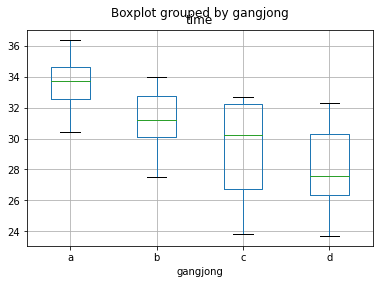

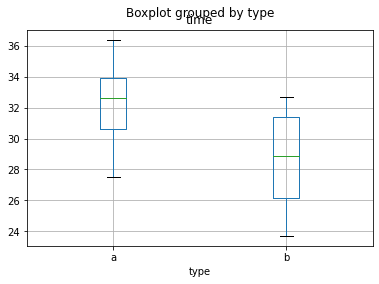

In [6]:
df.boxplot(column = "time", by = "gangjong")
df.boxplot(column = "time", by = "type")

강종 별로 2차정련시간 분포와 type별로 2차 정련시간 분포를 확인하였다. a강종에서 정련시간이 대체적으로 오래걸리고 d강종에서 대체적으로 시간이 적게 걸린다는 것을 알 수 있다. type별로 확인할 때는 a type일 때가 b type보다 상대적으로 2차 정련시간이 오래걸리는 경향이 있다는 것을 알 수 있다.

In [7]:
# lm = smf.ols('time ~C(gangjong)', data = df).fit()
# print(anova_lm(lm))# 카테고리 데이터는 C넣어줘야함 p벨류가 0.05보다 작으므로 영향을 줌
# lm.summary()

In [8]:
# 2way 일때
formula = 'time ~ C(gangjong) + C(type) + C(gangjong):C(type)'
lm = smf.ols(formula, df).fit()

print(anova_lm(lm)) #강종만 영향이 있다고 볼수있음
lm.summary()

                       df      sum_sq    mean_sq         F    PR(>F)
C(gangjong)           3.0  104.603333  34.867778  4.171868  0.019013
C(type)               1.0    4.098794   4.098794  0.490413  0.491810
C(gangjong):C(type)   3.0   17.262445   5.754148  0.688474  0.569645
Residual             20.0  167.156667   8.357833       NaN       NaN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     4.172
Date:                Thu, 28 Oct 2021   Prob (F-statistic):             0.0190
Time:                        01:30:56   Log-Likelihood:                -57.345
No. Observations:                  24   AIC:                             122.7
Df Residuals:                      20   BIC:                             127.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        33.5667      1.180     28.440      0.000      31.105      36.029
C(gangjong)[T.b]                 -2.4167      1.669     -1.448      0.163      -5.898       1.065
C(gangjong)[T.c]                 -0.9354      0.552     -1.695      0.106      -2.087       0.216
C(gangjong)[T.d]                 -1.5271      0.552     -2.766      0.012      -2.679      -0.376
C(type)[T.b]                     -2.4625      0.723     -3.407      0.003      -3.970      -0.955
C(gangjong)[T.b]:C(type)[T.b]          0          0        nan        nan           0           0
C(gangjong)[T.c]:C(type)[T.b]    -0.9354      0.552     -1.695      0.106      -2.087       0.216
C(gangjong)[T.d]:C(type)[T.b]    -1.5271      0.552     -2.766      0.012      -2.679      -0.376
==============================================================================
Omnibus:                        1.440   Durbin-Watson:                   2.334
Prob(Omnibus):                  0.487   Jarque-Bera (JB):                1.115
Skew:                          -0.298   Prob(JB):                        0.573
Kurtosis:                       2.128   Cond. No.                     2.36e+33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.44e-66. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

카테고리 중 강종 카테고리만이 p-value 가 충분히(유의수준 0.05)낮은 것을 확인 할 수 있다. 따라서 강종 카테고리는 2차 정련 시간에 강한 연관성을 가지고 있다는 것을 알 수 있다. type 카테고리는 p-value가 높아 2차 정련 시간에 연관성을 가지고 있다고 볼 수 없다. 그리고 강종 카테고리와 type 카테고리간에도 p-value가 높아 연관성이 없다고 할 수 있다. 

## 실습 5 p174

### 초코칩의 강도와 재료 반죽온도간에 관계를 분석하기 위한 상관분석을 하시오

Correlation Analysis
corr: -0.723
p-value : 0.000


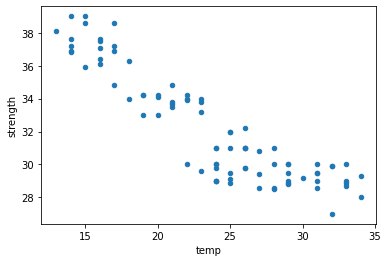

In [9]:
df = pd.read_csv("correlation.csv",engine="python")
df.head()

df1 = df['strength'][0:20]
df2 = df['temp'][0:20]
 
df.plot.scatter(x='temp',y='strength')
corr, pval = stats.pearsonr(df1,df2)

print("Correlation Analysis")
print("corr: {:.3f}".format(corr))
print("p-value : {:.3f}".format(pval))


산점도를 출력하였을 때 온도와 초코칩의 강도는 음의 상관관계를 가지는 것으로 보인다. 그 후 상관분석을 하였을 때 상관계수가 -0.723 이므로 초코칩의 강도와 재료 반죽 온도간에 음의 방향으로 상관성이 있다고 할 수 있다. 즉, 재료 반죽 온도가 높을 수 록 초코칩의 강도가 낮아진다고 할 수 있다.

## 실습 6 p204

### 초코칩의 강도와 굽는 시간과의 인과관계를 분석하기 위한 회귀분석 실시와 회귀식 도출

In [10]:
df = pd.read_csv("correlation.csv",engine="python")
df.head()
df = df[['strength','b_time']][0:20] #자료중 앞에서 20개만 사용하기에 
df.describe()

,strength,b_time
count,20.000000,20.000000
mean,36.965000,0.776221
std,1.565172,0.040759
min,33.000000,0.695121
25%,36.375000,0.741917
50%,37.150000,0.762333
75%,37.725000,0.810774
max,39.000000,0.849020


계획한 대로 20개의 자료를 불러 온 것을 확인 할 수 있었고 각 값들의 분포를 확인 할 수 있었다.

<AxesSubplot:xlabel='b_time', ylabel='strength'>

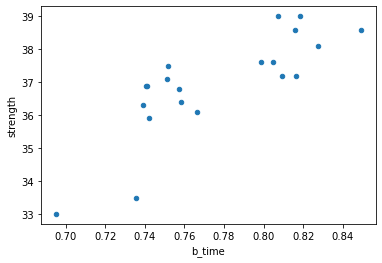

In [11]:
df.plot.scatter(x='b_time', y = 'strength')

산점도를 출력하였을 때, 굽는 시간과 쿠키의 강도는 비례하는것으로 보인다.

In [12]:
df.corr(method='pearson').round(3)

,strength,b_time
strength,1.000,0.804
b_time,0.804,1.000


초코칩의 강도와 굽는 시간의 상관계수가 0.804 이므로 두 변수는 높은 선형 관계에 있음을 알 수 있다.

In [13]:
reg_model = smf.ols(formula = "strength ~ b_time", data =df)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     32.90
Date:                Thu, 28 Oct 2021   Prob (F-statistic):           1.95e-05
Time:                        01:30:56   Log-Likelihood:                -26.431
No. Observations:                  20   AIC:                             56.86
Df Residuals:                      18   BIC:                             58.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0013      4.184      3.108      0.0

No. Observations 항목에서 자료의 갯수 : 20  
DF Residuals 항목에서 잔차 자유도 :18  
DF Model 항목에서 모델 자유도 : 1  
R-squared 항목에서 설명력 : 0.646  

b_time 의 p value값이 0이므로 strength와 연관성이 있다고 볼수있다.

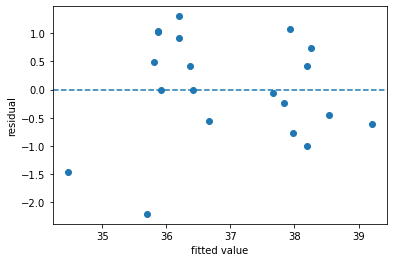

In [14]:
#잔차의 등분산성 : x-예측값, y-잔차
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value"); plt.ylabel("residual")
plt.axhline(y=0, linestyle = "--")

잔차들이 0을 중심으로 대칭적으로 랜덤하게 나타나고 모두 -2와 2 사이에 이으므로 등분산성을 만족한다.

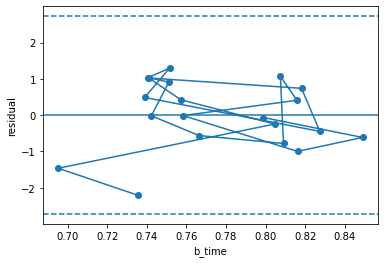

In [15]:
#잔차의 독립성
plt.plot(df["b_time"], reg_result.resid, marker = "o")
plt.xlabel("b_time")
plt.ylabel("residual")
plt.axhline(y=0, linestyle = "-")
plt.axhline(y=3*np.std(reg_result.resid), linestyle = "--")
plt.axhline(y=-3*np.std(reg_result.resid), linestyle = "--")

가로축의 변화에 따라 일정한 양상이 보이지 않으므로 독립성을 가지고 있음을 알 수있다.


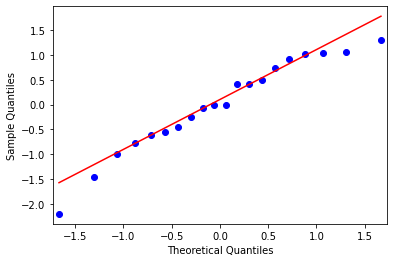

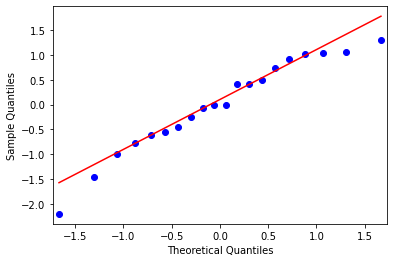

In [16]:
#잔차 정규성 검정 :Q-Q plot, s-standardized line
qqplot(reg_result.resid, line = "q")

표준화된 잔차들을 가로축의 예측 값이 증가함에따라 이들 잔차들의 패턴이 선형적으로 증가하는 양상을 볼 수 있다.

In [17]:
#정규성 검정
from statsmodels.stats.stattools import omni_normtest
omni_normtest(reg_result.resid, axis=0)

NormaltestResult(statistic=1.723765568445973, pvalue=0.4223661089835482)

정규분포 직선을 중심으로 분포하며 검정 통계량이 pavlue가 0.05보다 커서 귀무가설을 채택하므로 정규분포를 따른다는 것을 알 수 있다.

### 최종 회귀식

 $ y = 13.0013 + 30.8723 * Bakingtime $
 
 
 Baking Time이 1 증가할때마다 강도는 30.8723이 증가  
 
 초코칩 강도 = 13.0013 + 30.8723 * 굽는 시간 